## Amazon Review - Sentimental Analysis
Analysing Amazon Reiew Dataset and building classification model to predict if the sentiment of a given statement is positive, Negative or Neutral.

## DataSet Review
__Attributes__
* Rating - Classification based on Title. 1 - Negative, 2 - Positive
* Title - Short Summary of the review
* Description - Detailed description of the review


## Objective
To perform sentiment analysis and sentiment modeling on the review to understand customer preferences and satisfaction level.

## Project Overflow
### Text Preprocessing
### Text Visualization
### Sentiment Analysis
### Future Engineering
### Sentiment Modeling

### 1. Importing required Libraries

In [6]:
#pip install textblob

In [7]:
#pip install wordcloud

In [175]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from textblob import Word, TextBlob
from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moort\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import csr_matrix

### 2. Load the Dataset

In [179]:
df_old = pd.read_csv("C:/Users/moort/GUVI-PROJECTS/NLP/DataSet/train.csv", header=None)
df = df_old[0:100000]
df.head()

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [182]:
df.shape

(100000, 3)

In [184]:
header_names = ['Rating','Title','Description']
df.columns = header_names

In [186]:
df.head()

,Rating,Title,Description
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


### 3. EDA

In [188]:
df.shape

(100000, 3)

In [190]:
df.describe()

,Rating
count,100000.000000
mean,1.512670
std,0.499842
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [192]:
df.describe(include='object')

,Title,Description
count,99995,100000
unique,86457,99952
top,Disappointed,These DVDs are absolutely rip offs. M-1 had so...
freq,256,3


In [194]:
df.isnull().sum()

Rating         0
Title          5
Description    0
dtype: int64

In [196]:
null_ratio = df.isnull().sum() / df.shape[0]
print(null_ratio)

Rating         0.00000
Title          0.00005
Description    0.00000
dtype: float64


In [198]:
df.dropna(inplace=True)

In [200]:
df.isnull().sum()

Rating         0
Title          0
Description    0
dtype: int64

In [23]:
fb_neg = df[df['Rating'] == 1]['Title']

print("Negative Feedbacks: ",fb_neg)


Negative Feedbacks:  6                                     Buyer beware
10                                      The Worst!
13                                       Oh please
14                            Awful beyond belief!
15         Don't try to fool us with fake reviews.
                            ...                   
3599994                             Too simplistic
3599995                              Don't do it!!
3599996              Looks nice, low functionality
3599997                 compact, but hard to clean
3599998                         what is it saying?
Name: Title, Length: 1799880, dtype: object


In [24]:
fb_pos = df[df['Rating'] == 2]['Title']

print(fb_pos)

0                             Stuning even for the non-gamer
1                      The best soundtrack ever to anything.
2                                                   Amazing!
3                                       Excellent Soundtrack
4          Remember, Pull Your Jaw Off The Floor After He...
                                 ...                        
3599989                                           Amazing CD
3599990               Buy this CD and you'll thank yourself!
3599991                                          Tyler Rocks
3599992                                              AWESOME
3599999                Makes My Blood Run Red-White-And-Blue
Name: Title, Length: 1799913, dtype: object


In [202]:
df['Rating'].value_counts()

Rating
2    51264
1    48731
Name: count, dtype: int64

#### 3.1 EDA Summary

* Amazon Review Dataset has __36 Lakhs Rows and 3 Columns__
* Title column has 207 missing values. Droping the missing value from dataset will not affect the model performance as the ratio of null value to total count is very less (0.000058).
* Total __Positive__ feedbacks are __1799913__
* Total __Negative__ Feedbacks are __1799880__

### 4. Text Preprocessing

#### 4.1 Normalizing Case Folding

In the first step of NLP project, we converted the comments in Title column to lower case. This standardize the data into uniform format, eliminating inconsistency in case sensitivity during text processing.

In [204]:
df['Title']

0                           Stuning even for the non-gamer
1                    The best soundtrack ever to anything.
2                                                 Amazing!
3                                     Excellent Soundtrack
4        Remember, Pull Your Jaw Off The Floor After He...
                               ...                        
99995                                                 Good
99996                                    THE REAL SUPERMAN
99997    It gets one star because zero was not an optio...
99998                               Don't Spend Your Money
99999                                       Enough already
Name: Title, Length: 99995, dtype: object

In [206]:
df['Title'] = df['Title'].str.lower()

In [33]:
df['Title']

0                             stuning even for the non-gamer
1                      the best soundtrack ever to anything.
2                                                   amazing!
3                                       excellent soundtrack
4          remember, pull your jaw off the floor after he...
                                 ...                        
3599995                                        don't do it!!
3599996                        looks nice, low functionality
3599997                           compact, but hard to clean
3599998                                   what is it saying?
3599999                makes my blood run red-white-and-blue
Name: Title, Length: 3599793, dtype: object

#### 4.2 Punctuation

In this step, we remove the punctuations from the 'Title' column. This process aims to enhance the efficiency of our text processing task by making our text data cleaner and understand to analysis.

In [208]:
df['Title'] = df['Title'].str.replace('[^\w\s]', '', regex=True)

In [37]:
df['Title']

0                              stuning even for the nongamer
1                       the best soundtrack ever to anything
2                                                    amazing
3                                       excellent soundtrack
4          remember pull your jaw off the floor after hea...
                                 ...                        
3599995                                           dont do it
3599996                         looks nice low functionality
3599997                            compact but hard to clean
3599998                                    what is it saying
3599999                   makes my blood run redwhiteandblue
Name: Title, Length: 3599793, dtype: object

\w - matches any alphanumeric charaters and underscores. 

\s - matches any whitespaces characters such as spaces, newlines, tabs

#### 4.3 Numbers

In this step, we remove the numbers from the 'Title' column. By removing numbers, our text processing task make our text data cleaner and more meaningful data analysis.

In [210]:
df['Title'] = df['Title'].str.replace('\d','', regex=True)

In [212]:
df['Title']

0                            stuning even for the nongamer
1                     the best soundtrack ever to anything
2                                                  amazing
3                                     excellent soundtrack
4        remember pull your jaw off the floor after hea...
                               ...                        
99995                                                 good
99996                                    the real superman
99997      it gets one star because zero was not an option
99998                                dont spend your money
99999                                       enough already
Name: Title, Length: 99995, dtype: object

#### 4.4 Stopwords

In this step, by removing frequently repeated or often meaningless words ('is', 'the','in'), from text, we can focus on meaningful words which will improve our NLP oerformance.

In [214]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [216]:
df['Title'] = df['Title'].apply(lambda x: " ".join(x for x in str(x).split() if x not in STOPWORDS))

In [218]:
df['Title']

0                  stuning even nongamer
1          best soundtrack ever anything
2                                amazing
3                   excellent soundtrack
4        remember pull jaw floor hearing
                      ...               
99995                               good
99996                      real superman
99997          gets one star zero option
99998                   dont spend money
99999                     enough already
Name: Title, Length: 99995, dtype: object

#### 4.5 Rarewords

In this step, we combine all the comments or review in th 'Title' column, then split the resulting text into words, then count the frequency of the each word. In this process we identified the words that appear only once.subsequently we remvoe the rare words from the column will improve the NLP model focus on more significant words.

In [220]:
temp_df = pd.Series(' '.join(df['Title']).split()).value_counts()
temp_df

great            7241
good             5498
book             5313
movie            3135
best             2933
                 ... 
aubreymaturin       1
schizophrenic       1
smalllike           1
complainted         1
heats               1
Name: count, Length: 29223, dtype: int64

In [222]:
drops = temp_df[temp_df <= 1]

In [224]:
drops

reminders        1
proj             1
bitesize         1
dolittle         1
wackiiness       1
                ..
aubreymaturin    1
schizophrenic    1
smalllike        1
complainted      1
heats            1
Name: count, Length: 16248, dtype: int64

In [226]:
df['Title'] = df['Title'].apply(lambda x:" ".join(x for x in str(x).split() if x not in drops))

In [228]:
df['Title'] 

0                                   even
1          best soundtrack ever anything
2                                amazing
3                   excellent soundtrack
4        remember pull jaw floor hearing
                      ...               
99995                               good
99996                      real superman
99997          gets one star zero option
99998                   dont spend money
99999                     enough already
Name: Title, Length: 99995, dtype: object

#### 4.6 Tokenization

In this part, we transformed all the comment/review in the 'Title' column into TextBlop object and then tokenize them into words. TextBlops easily split the comment into tokens.This process enable us to examine each words in each comment and conduct more detailed NLP analysis based on the words.

In [230]:
df['Title'].apply(lambda x: TextBlob(x).words).head()

0                                   [even]
1       [best, soundtrack, ever, anything]
2                                [amazing]
3                  [excellent, soundtrack]
4    [remember, pull, jaw, floor, hearing]
Name: Title, dtype: object

#### 4.7 Lemmatization

In this step, we lemmatize each review in the 'Title' column to its root or base word. Lemmatization reduces different forms of words. This provide more cosistent and meaning data processing in NLP analysis.

In [60]:
#nltk.download('punkt')

In [232]:
df['Title'] = df['Title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [234]:
df['Title']

0                                   even
1          best soundtrack ever anything
2                                amazing
3                   excellent soundtrack
4        remember pull jaw floor hearing
                      ...               
99995                               good
99996                      real superman
99997           get one star zero option
99998                   dont spend money
99999                     enough already
Name: Title, Length: 99995, dtype: object

### 5. Text Visualization

#### 5.1 Calculation of word frequencies

In this step, we calculated the frequencies of all words in the review of the 'Title' column. We separated the words in each comment, determined how many times each word appeared in that comment, and summed these numbers. Then, we converted these frequencies into a DataFrame and named the columns 'words' and 'freq'. Finally, we sorted this DataFrame in descending order of 'freq' values. This process helps us identify the most frequently used words in the review.


freq = df['Title'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
freq

#### 5.2 WordCloud 

In this section, we create and visualize a word cloud using the review from the 'Title' column. The purpose is to display the frequently occurring words in the dataset in a visual forma. This allows for a quick observation of the key trends and prominent features in the text data.

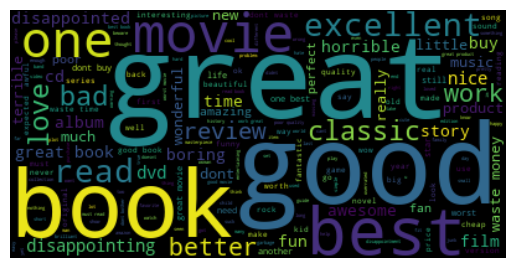

In [236]:
txt = " ".join(i for i in df.Title)
word_cloud = WordCloud().generate(txt)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Sentimental Analysis

### 7. Future Engineering

It is the process of extracting features from raw data. In this, we are converting each word into vector because meachine learning models only understand __Numbers__. In __NLP__ we also call it as __Text Representation__

In [238]:
X_train, X_test, y_train,y_test = train_test_split(df.Title, df.Rating, test_size=0.2)

In [240]:
X_train.shape

(79996,)

In [242]:
X_test.shape

(19999,)

In [244]:
X_train[:5]

91596                                best
61964                           book good
25065             transformer movie video
71413                                love
63461    squeeze entertaining minute hour
Name: Title, dtype: object

In [246]:
y_train[:5]

91596    2
61964    1
25065    2
71413    2
63461    1
Name: Rating, dtype: int64

In [250]:
y_train.shape

(79996,)

In [248]:
y_test.shape

(19999,)

#### 7.1 Count Vectorization

In [252]:
cnt_v = CountVectorizer()
X_train_cv = cnt_v.fit_transform(X_train.values)
X_train_cv

<79996x11356 sparse matrix of type '<class 'numpy.int64'>'
	with 208035 stored elements in Compressed Sparse Row format>

In [254]:
X_train_sparse = csr_matrix(X_train_cv)

In [256]:
X_train_sparse

<79996x11356 sparse matrix of type '<class 'numpy.int64'>'
	with 208035 stored elements in Compressed Sparse Row format>

In [258]:
cnt_v.get_feature_names_out()[10:30]

array(['abe', 'ability', 'able', 'abnormal', 'abominable', 'abomination',
       'abound', 'abraham', 'abridged', 'abridgement', 'abridgment',
       'abrupt', 'absent', 'absolute', 'absolutely', 'absolutley',
       'absolutly', 'absorb', 'absorbing', 'absorption'], dtype=object)

In [260]:
cnt_v.get_feature_names_out().shape

(11356,)

##### 7.1.1 Count Vectorization - N Gram Frequency

In [262]:
cnt_v_ng = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_train_cv_ng = cnt_v_ng.fit_transform(X_train.values)
X_train_cv_ng

<79996x85107 sparse matrix of type '<class 'numpy.int64'>'
	with 131589 stored elements in Compressed Sparse Row format>

In [264]:
cnt_v_ng.get_feature_names_out().shape

(85107,)

In [266]:
cnt_v_ng.get_feature_names_out()[10:30]

array(['aaliyah truly', 'aaliyahs best', 'aaliyahs last', 'aamt book',
       'aaron carter', 'abandoned one', 'abandoned true', 'abbey lover',
       'abbey road', 'abducted twice', 'ability care', 'ability us',
       'ability wwii', 'able find', 'able first', 'able fix', 'able get',
       'able play', 'able put', 'able something'], dtype=object)

#### 7.2 TF-IDF

In [268]:
tf_idf_word_v = TfidfVectorizer()
X_train_tf_idf = tf_idf_word_v.fit_transform(X_train.values)
X_train_tf_idf

<79996x11356 sparse matrix of type '<class 'numpy.float64'>'
	with 208035 stored elements in Compressed Sparse Row format>

In [270]:
X_train_tf_idf.shape

(79996, 11356)

In [272]:
tf_idf_word_v.get_feature_names_out().shape

(11356,)

##### 7.2.1 TF-IDF - N Gram Frequency

In [274]:
tf_idf_word_v_ng = TfidfVectorizer(ngram_range=(2,2))
X_train_tf_idf_ng = tf_idf_word_v_ng.fit_transform(X_train.values)
X_train_tf_idf_ng

<79996x85107 sparse matrix of type '<class 'numpy.float64'>'
	with 131589 stored elements in Compressed Sparse Row format>

In [276]:
tf_idf_word_v_ng.get_feature_names_out().shape

(85107,)

In [278]:
tf_idf_word_v_ng.get_feature_names_out()[10:30]

array(['aaliyah truly', 'aaliyahs best', 'aaliyahs last', 'aamt book',
       'aaron carter', 'abandoned one', 'abandoned true', 'abbey lover',
       'abbey road', 'abducted twice', 'ability care', 'ability us',
       'ability wwii', 'able find', 'able first', 'able fix', 'able get',
       'able play', 'able put', 'able something'], dtype=object)

### 8. Sentiment Modelling

#### 8.1 Random Forest

In [280]:
df['Title'].value_counts()

Title
                                    2051
great                                511
good                                 511
disappointed                         492
disappointing                        441
                                    ... 
still waiting receive product          1
want three dollar used rent back       1
roxanne still stuff                    1
totally charming enjoyable             1
get one star zero option               1
Name: count, Length: 67573, dtype: int64

In [282]:
df['Rating'].value_counts()

Rating
2    51264
1    48731
Name: count, dtype: int64

In [284]:
X_train_cv.shape

(79996, 11356)

In [286]:
y_test.shape

(19999,)

In [288]:
y_train.shape

(79996,)

##### Random forest Model with Count Vector

In [290]:
rand_for_mdl = RandomForestClassifier()


In [294]:
rand_for_mdl.fit(X_train_cv, y_train)

RandomForestClassifier()

In [300]:
#print(cross_val_score(rand_for_mdl, X_train_cv, y_train, cv=5, n_jobs=-1).mean())
#print(cross_val_score(rand_for_mdl, X_test, y_test, cv=5, n_jobs=-1).mean())
print(rand_for_mdl.score(X_train_cv,y_train))

0.9527976398819941


##### Random forest Model with IF_IDF

In [306]:
rand_for_mdl.fit(X_train_tf_idf, y_train)

RandomForestClassifier()

In [308]:
#print(cross_val_score(rand_for_mdl_1, X_train_tf_idf, y_train, cv=5, n_jobs=-1).mean())
print(rand_for_mdl.score(X_train_tf_idf,y_train))

0.952397619880994


##### Random forest Model with IF_IDF-N-Gram

In [310]:
rand_for_mdl.fit(X_train_tf_idf_ng, y_train)

RandomForestClassifier()

In [312]:
#print(cross_val_score(rand_for_mdl_2, X_train_tf_idf_ng, y_train, cv=5, n_jobs=-1).mean())
print(rand_for_mdl.score(X_train_tf_idf_ng,y_train))

0.8909445472273614
